In [98]:
import numpy as np

import matplotlib as mpl
from matplotlib.colors import LinearSegmentedColormap, ListedColormap
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import cv2
import pylab
from tifffile import imread
import tifffile as tiff


In [99]:
data_path = '/media/shuhang/T8/projects/RA/dalian/evaluate'
path2 ='_40_dalian_x13568_y7680.tif_label.txt'
tif_path = '/media/shuhang/T8/projects/draw/feature_dalian_x13568_y7680.tif'
labelnp_path = '/media/shuhang/T8/projects/RA/dalian/evaluate/_40_dalian_x13568_y7680.tif_label.npy'
out_np_path = '/media/shuhang/T8/projects/RA/dalian/evaluate/_40_dalian_x13568_y7680.tif_out.npy'
img_path = '/media/shuhang/T8/projects/draw/feature_dalian_x13568_y7680.tif'
labelnp = np.load(labelnp_path)
labelnp = labelnp.squeeze(0)

outnp = np.load(out_np_path)
outnp = outnp.squeeze(0)

# img = imread(img_path)
# img = np.asarray(img)
# img = img/img.max()
# img = img[:,:,25:28]*255-0.001
# print(img.shape)
# img_rgb = np.array(img, dtype = np.uint8)
# # img_rgb = img_rgb.transpose(2,0,1)
# print(img.shape)
# plt.imshow(img)
# plt.show()
data = [labelnp,outnp]

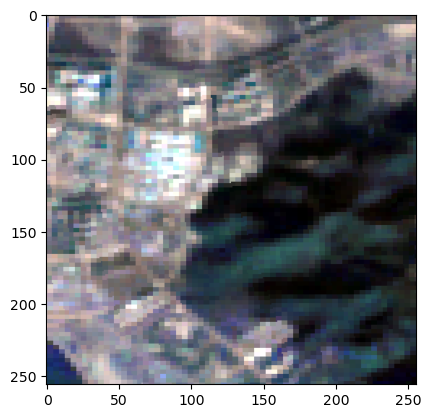

In [100]:

def scale_percentile(matrix):
    w, h, d = matrix.shape
    matrix = np.reshape(matrix, [w * h, d]).astype(np.float64)
    # Get 2nd and 98th percentile
    mins = np.percentile(matrix, 1, axis=0)
    maxs = np.percentile(matrix, 99, axis=0) - mins
    matrix = (matrix - mins[None, :]) / maxs[None, :]
    matrix = np.reshape(matrix, [w, h, d])
    matrix = matrix.clip(0, 1)
    return matrix

img = tiff.imread(img_path)
plt.imshow(scale_percentile(img[:,:,:3]))


In [101]:
def show_cmap(cmap, norm=None, extend=None):
    '''展示一个colormap.'''
    if norm is None:
        norm = mcolors.Normalize(vmin=0, vmax=cmap.N)
    im = cm.ScalarMappable(norm=norm, cmap=cmap)

    fig, ax = plt.subplots(figsize=(6, 1))
    fig.subplots_adjust(bottom=0.5)
    fig.colorbar(im, cax=ax, orientation='horizontal', extend=extend)
    plt.show()

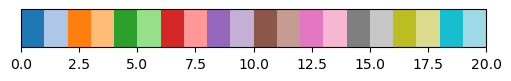

In [102]:
cm.tab20.colors
show_cmap(cm.tab20)

2


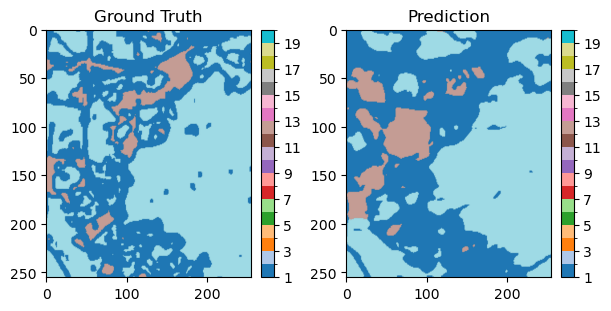

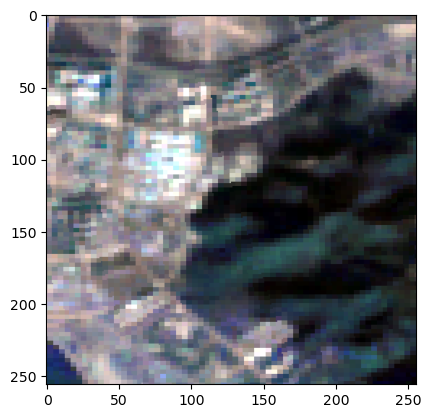

In [125]:
def plot_examples(colormaps, data, bins,titles):
    """
    Helper function to plot data with associated colormap.
    """
    
    nbin = len(bins) - 1
    norm = mcolors.BoundaryNorm(bins, nbin)
    n = len(colormaps)
    print(n)
    fig, axs = plt.subplots(1, n, figsize=(n * 2 + 2, 3),#n * 2 + 2, 3
                            layout='constrained', squeeze=False)
    for index, [ax, cmap] in enumerate(zip(axs.flat, colormaps)):
        #psm = ax.pcolormesh(data, cmap=cmap, rasterized=True, vmin=0, vmax=20)
        psm = ax.pcolormesh(data[index], cmap=cmap, norm=norm, shading='gouraud')
        fig.colorbar(psm, ax=ax)
        ax.invert_yaxis()
#         ax.invert_xaxis()
        ax.set_title(titles[index])
    plt.show()
    plt.imshow(scale_percentile(img[:,:,:3]))
bins = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
coolormaps = [cm.tab20,cm.tab20]
titles = ['Ground Truth','Prediction']
plot_examples(coolormaps,data,bins,titles)

0
index:  0
1
index:  1
2


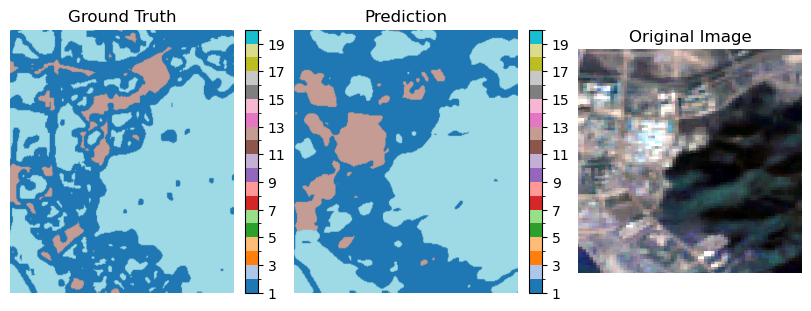

In [149]:
def plot_examples(colormaps, data, bins,titles):
    """
    Helper function to plot data with associated colormap.
    """
    
    nbin = len(bins) - 1
    norm = mcolors.BoundaryNorm(bins, nbin)
    n = len(colormaps)
#     print(n)
    fig, axs = plt.subplots(1, n, figsize=(n * 2 + 2, 3),#n * 2 + 2, 3
                            layout='constrained', squeeze=False)
    for index, [ax, cmap] in enumerate(zip(axs.flat, colormaps)):
        print(index)
        if index == n-1:
            ax.set_title('Original Image')
            ax.set_axis_off()
            plt.imshow(scale_percentile(img[:,:,:3]))
        else:
            #psm = ax.pcolormesh(data, cmap=cmap, rasterized=True, vmin=0, vmax=20)
            print('index: ',index)
            psm = ax.pcolormesh(data[index], cmap=cmap, norm=norm, shading='gouraud')
            fig.colorbar(psm, ax=ax)
            ax.invert_yaxis()
            ax.set_axis_off()
    #         ax.invert_xaxis()
            ax.set_title(titles[index])
    

    
    plt.show()
bins = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
coolormaps = [cm.tab20,cm.tab20,cm.tab20]
titles = ['Ground Truth','Prediction']
plot_examples(coolormaps,data,bins,titles)

